# Notebook to aggregate diagnostics on DMS data

## Import libraries

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Specify paths

In [3]:
processed_data_outpath = '../processed_data/'
aggdata_outpath = '../aggregated_data/'
graph_outpath = '../diagnostics_graphs/'

## Get stats on detected variants

In [4]:
list_df = []

for d in glob.glob(processed_data_outpath+'/*'):
    # Get info from name of directory
    cset = os.path.basename(d).split('_') # Use of split('/') won't work across platforms
    cset_name = '_'.join(cset) # Basename based on conditions
    strain, locus, pool_type, compound = [cset[i] for i in (0,1,2,-1)]
    
    # Open dataframe and add info
    diagdf = pd.read_csv(f'{d}/detected_variants.csv', index_col=0)
    max_var = diagdf['Usable_variants'].max()
    unseq = diagdf['Unsequenced_variants'].max()
    coverage_var = 100*round((max_var/(max_var + unseq)),3)
    min_rc_perc = diagdf['Usable_variants_%rc'].min()
    
    df = pd.DataFrame([[strain, locus, pool_type, compound, max_var, unseq, coverage_var, min_rc_perc]],
                      columns=['strain','locus','pool_type','compound',
                                'detected_variants','unsequenced_variants','coverage_variants_%',
                                'detected_variants_%rc'])
    
    # Add dataframe to list
    list_df.append(df)

diag = pd.concat(list_df, ignore_index=True)
diag.sort_values(by=['strain','locus','pool_type','compound'])

,strain,locus,pool_type,compound,detected_variants,unsequenced_variants,coverage_variants_%,detected_variants_%rc
0,BY4741,FKS1-HS1,double,anidulafungin,7591,27819,21.4,98.0
1,BY4741,FKS1-HS1,double,caspofungin,7591,27819,21.4,97.9
2,BY4741,FKS1-HS1,double,micafungin,7591,27819,21.4,98.0
3,BY4741,FKS1-HS1,double,none,7591,27819,21.4,98.4
4,BY4741,FKS1-HS1,single,anidulafungin,315,18,94.6,93.7
5,BY4741,FKS1-HS1,single,caspofungin,315,18,94.6,96.8
6,BY4741,FKS1-HS1,single,micafungin,315,18,94.6,92.8
7,BY4741,FKS1-HS1,single,none,315,18,94.6,93.7
8,BY4741,FKS1-HS2,double,anidulafungin,3364,24098,12.2,96.5
9,BY4741,FKS1-HS2,double,caspofungin,3364,24098,12.2,96.2


## Get stats on coverage per sequence type

In [5]:
list_df = []

for d in glob.glob(processed_data_outpath+'/*'):
    # Get info from name of directory
    cset = os.path.basename(d).split('_') # Use of split('/') won't work across platforms
    cset_name = '_'.join(cset) # Basename based on conditions
    strain, locus, pool_type, compound = [cset[i] for i in (0,1,2,-1)]
    
    # Filter on pools of single mutants and ortholog sequences
    if pool_type == 'single':
        # Open dataframe and add info
        diagdf = pd.read_csv(f'{d}/readcount_per_library.csv', index_col=0)
        diagdf.reset_index(names='sample', inplace=True)
        
        # Retrieve average read depth in % for WT, single and ortho
        WT_input = round(diagdf.loc[diagdf['sample'].str.contains('input'), 'WT_%'].mean(),2)
        WT_output = round(diagdf.loc[~diagdf['sample'].str.contains('input'), 'WT_%'].mean(),2)
        single_input = round(diagdf.loc[diagdf['sample'].str.contains('input'), 'single_mut_readcount_%'].mean(),2)
        single_output = round(diagdf.loc[~diagdf['sample'].str.contains('input'), 'single_mut_readcount_%'].mean(),2)
        ortho_input = round(diagdf.loc[diagdf['sample'].str.contains('input'), 'ortho_mut_readcount_%'].mean(),2)
        ortho_output = round(diagdf.loc[~diagdf['sample'].str.contains('input'), 'ortho_mut_readcount_%'].mean(),2)
        
        # Calculate ratios of WT + single to ortho
        diagdf['observed_ratio'] = (diagdf['WT_%'] + diagdf['single_mut_readcount_%'])/100
        
        # Retrieve average values
        obs_input = round(diagdf.loc[diagdf['sample'].str.contains('input'), 'observed_ratio'].mean(),2)
        obs_output = round(diagdf.loc[~diagdf['sample'].str.contains('input'), 'observed_ratio'].mean(),2)
        
        df = pd.DataFrame([[strain, locus, pool_type, compound,
                            WT_input, WT_output, single_input, single_output, ortho_input, ortho_output,
                            obs_input, obs_output
                           ]],
                          columns=['strain','locus','pool_type','compound',
                                   'WT_input', 'WT_output', 'single_input', 'single_output', 'ortho_input', 'ortho_output',
                                   'observed_input_ratio', 'observed_output_ratio'
                                  ])
        
        # Add dataframe to list
        list_df.append(df)

diag = pd.concat(list_df, ignore_index=True)
diag.sort_values(by=['strain','locus','pool_type','compound'], inplace=True)

# Add expected ratios of WT + single to ortho
diag.loc[diag.locus == 'FKS1-HS1', 'expected_input_ratio'] = .85
diag.loc[diag.locus == 'FKS1-HS2', 'expected_input_ratio'] = .72
diag.loc[diag.locus == 'FKS2-HS1', 'expected_input_ratio'] = .86
diag.loc[diag.locus == 'FKS2-HS2', 'expected_input_ratio'] = .80

diag

,strain,locus,pool_type,compound,WT_input,WT_output,single_input,single_output,ortho_input,ortho_output,observed_input_ratio,observed_output_ratio,expected_input_ratio
0,BY4741,FKS1-HS1,single,anidulafungin,3.10,0.10,82.55,79.20,14.40,20.70,0.86,0.79,0.85
1,BY4741,FKS1-HS1,single,caspofungin,3.10,0.03,82.55,78.13,14.40,21.80,0.86,0.78,0.85
2,BY4741,FKS1-HS1,single,micafungin,3.10,0.10,82.55,75.13,14.40,24.83,0.86,0.75,0.85
3,BY4741,FKS1-HS1,single,none,3.10,3.10,82.55,81.63,14.40,15.23,0.86,0.85,0.85
4,BY4741,FKS1-HS2,single,anidulafungin,0.33,0.30,75.90,96.00,23.77,3.73,0.76,0.96,0.72
5,BY4741,FKS1-HS2,single,caspofungin,0.33,0.43,75.90,91.13,23.77,8.43,0.76,0.92,0.72
6,BY4741,FKS1-HS2,single,micafungin,0.33,0.40,75.90,98.00,23.77,1.63,0.76,0.98,0.72
7,BY4741,FKS1-HS2,single,none,0.33,0.30,75.90,73.40,23.77,26.27,0.76,0.74,0.72
8,BY4741,FKS2-HS1,single,none,1.90,1.83,86.97,86.30,11.13,11.87,0.89,0.88,0.86
9,BY4741,FKS2-HS2,single,none,19.80,2.13,61.67,75.57,18.57,22.30,0.81,0.78,0.80


## Visualization (V1)

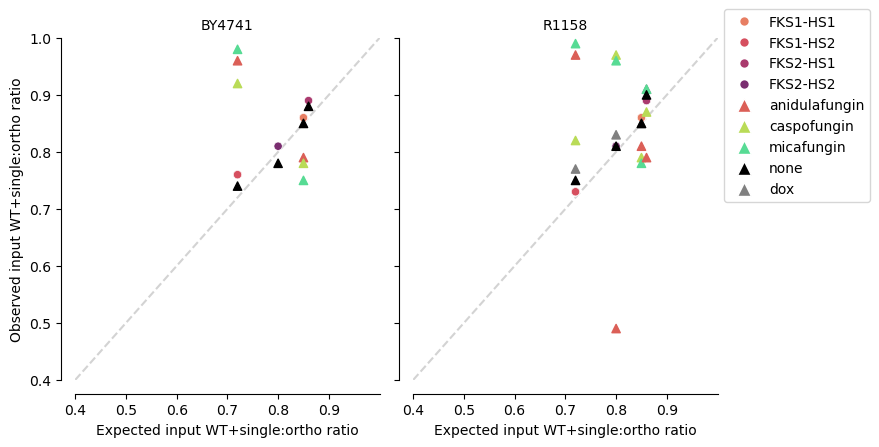

In [5]:
clevels = diag.compound.unique()
rgb_vals = sns.color_palette('hls', len(clevels))
color_map = dict(zip(clevels, rgb_vals))
color_map['none'] = 'black'
color_map['dox'] = 'grey'

g = sns.relplot(diag, col='strain',
                x='expected_input_ratio', y='observed_input_ratio',
                hue='locus', palette='flare',
                height=4.5
               )

for i, s in enumerate(diag.strain.unique()):
    d = diag[diag.strain == s]
    g.axes[0][i].scatter(x = d.expected_input_ratio, y = d.observed_output_ratio,
                         marker='^', c=d.compound.map(color_map))
    g.axes[0][i].axline((0,0), (1,1), ls='--', c='lightgrey', zorder=0)
    
g.set(xlim=(0.4, 1), ylim=(0.4,1),
      xlabel = 'Expected input WT+single:ortho ratio',
      ylabel = 'Observed input WT+single:ortho ratio'
     )
g.set_titles(col_template='{col_name}')
sns.despine(offset=10, trim=True)
yticks = g.axes[0][0].get_yticks()
plt.xticks([x for x in yticks if x <= .9])

from matplotlib.lines import Line2D
#from matplotlib.colors import to_rgba

handles, labels = g.axes[0][0].get_legend_handles_labels()
for comp, color in color_map.items():
    handles.append(Line2D([0], [0], marker='^', color='w', markerfacecolor=color, markersize=10))
    labels.append(comp)

g._legend.remove()
plt.legend(handles=handles, labels=labels,
           bbox_to_anchor=(1, 0.5), loc='lower left', title=None, frameon=True,
          )

g.tight_layout()

## Visualization (V2)

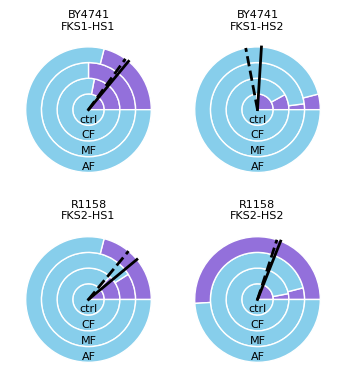

In [6]:
comp_abrev = {'none':'ctrl','dox':'ctrl', 'caspofungin':'CF', 'micafungin':'MF', 'anidulafungin':'AF'}
wcolors = ['mediumpurple','skyblue']

rc_dict = {'font.size':8,
           'axes.linewidth': 1, 'grid.linewidth': 1,
           'axes.labelsize':8,'axes.titlesize':8,
           'xtick.labelsize':8, 'ytick.labelsize':8,
           'xtick.major.pad':1, 'ytick.major.pad':1,
          }

plt.rcParams.update(rc_dict)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3.5,4))

for a, sl in enumerate([('BY4741','FKS1-HS1'),('BY4741','FKS1-HS2'),('R1158','FKS2-HS1'),('R1158','FKS2-HS2')]):
    s, l = sl[0], sl[1]
    
    exp_ratio = 1- round(diag.loc[(diag.strain == s)
                                  & (diag.locus == l),
                                  'expected_input_ratio'].values[0],2)
    
    obs_ratio = 1- round(diag.loc[(diag.strain == s)
                                  & (diag.locus == l),
                                  'observed_input_ratio'].values[0],2)
    
    groups = {}
    for i, c in enumerate(['none','caspofungin','micafungin','anidulafungin']):
        if (s == 'R1558') & (c == 'none'):
            c = 'dox'
        observed_output_ratio = round(diag.loc[(diag.strain == s)
                                               & (diag.locus == l)
                                               & (diag.compound == c),
                                               'observed_output_ratio'
                                              ].values[0],2)
        groups[comp_abrev[c]] = (i+1,
                                 [round(1-observed_output_ratio,2),
                                  observed_output_ratio])

    #print(sl, groups)
    size = 1/len(groups)
    ax = axs.flat[a]
    
    for k, v in groups.items():
        ax.pie(v[1], radius=v[0]*size, colors=wcolors,
               wedgeprops=dict(width=size, edgecolor='w'))
        # Labels
        ax.annotate(k, (0, 0.05-v[0]*size), ha='center', c='k')
    
    # Plot line showing expected proportion of orthologs
    exp_ratioRad = 2*math.pi*exp_ratio
    ax.plot([0, math.cos(exp_ratioRad)], # x1 and x2 to draw line for expected ratio
            [0, math.sin(exp_ratioRad)], # y1 and y 2 to draw line for expected ratio
            linewidth=2, color='k', ls='--',
            clip_on=False)

    # Plot line showing observed proportion in DMS input
    obs_ratioRad = 2*math.pi*obs_ratio
    ax.plot([0, math.cos(obs_ratioRad)], # x1 and x2 to draw line for expected ratio
            [0, math.sin(obs_ratioRad)], # y1 and y 2 to draw line for expected ratio
            linewidth=2, color='k',
            clip_on=False)
    
    # Subplot title
    ax.set_title(f'{s}\n{l}', pad=0)

fig.tight_layout()
plt.savefig(f'{graph_outpath}/NNKvsOrtho_pies.svg', format='svg', dpi=300)

## Visualization (V3)

In [6]:
BY11 = diag[(diag.strain == 'BY4741') & (diag.locus == 'FKS1-HS1')]
BY11

,strain,locus,pool_type,compound,WT_input,WT_output,single_input,single_output,ortho_input,ortho_output,observed_input_ratio,observed_output_ratio,expected_input_ratio
0,BY4741,FKS1-HS1,single,anidulafungin,3.1,0.10,82.55,79.20,14.4,20.70,0.86,0.79,0.85
1,BY4741,FKS1-HS1,single,caspofungin,3.1,0.03,82.55,78.13,14.4,21.80,0.86,0.78,0.85
2,BY4741,FKS1-HS1,single,micafungin,3.1,0.10,82.55,75.13,14.4,24.83,0.86,0.75,0.85
3,BY4741,FKS1-HS1,single,none,3.1,3.10,82.55,81.63,14.4,15.23,0.86,0.85,0.85


In [30]:
exp_ratio = BY11.expected_input_ratio[0]
obs_ratio = BY11.observed_input_ratio[0]

In [7]:
BY11['ortho_output_ratio'] = 1 - BY11['observed_output_ratio']

C:\Users\duran\AppData\Local\Temp\ipykernel_3780\2927666454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BY11['ortho_output_ratio'] = 1 - BY11['observed_output_ratio']


In [9]:
bar_plot = pd.DataFrame({'Highest Mark': [78, 70, 74, 88, 75, 72],
  'Lowest Mark': [42, 46, 40, 43, 41, 48],
  'Average Mark': [55, 58, 52, 56, 53, 50]},
  index = ['ABC', 'PQR', 'XYZ', 'MNP', 'CBD', 'BCD'])
bar_plot

,Highest Mark,Lowest Mark,Average Mark
ABC,78,42,55
PQR,70,46,58
XYZ,74,40,52
MNP,88,43,56
CBD,75,41,53
BCD,72,48,50


In [26]:
bp = BY11.groupby('compound')[['observed_output_ratio','ortho_output_ratio']].first()
sort_order = ['none','anidulafungin','caspofungin','micafungin']
sort_dic = dict(zip(sort_order, list(range(0,len(sort_order)))))
bp.sort_index(key=lambda x: x.map(sort_dic), inplace=True)
bp.rename(columns={'observed_output_ratio':'NNK variants',
                   'ortho_output_ratio':'ortholog variants'
                  }, inplace=True)

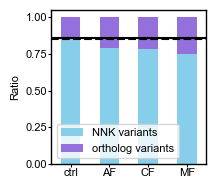

In [38]:
rc_dict = {'figure.figsize':(2,2),
           'font.family':'Arial',
           'font.size':8,
           'axes.linewidth': 1, 'grid.linewidth': 1,
           'axes.labelsize':8,'axes.titlesize':8,
           'xtick.labelsize':8, 'ytick.labelsize':8,
           'xtick.major.pad':1, 'ytick.major.pad':1,
           'xtick.major.size':2, 'ytick.major.size':2
          }
with plt.rc_context(rc_dict):
    ax = bp.plot(kind='bar', stacked=True, color=['skyblue','mediumpurple'])

plt.axhline(y=exp_ratio, ls='--', color='k')
plt.axhline(y=obs_ratio, ls='-', color='k')
plt.xlabel('')
plt.ylabel('Ratio')
ax.set_xticks([0,1,2,3],['ctrl', 'AF', 'CF', 'MF'], rotation=0)

plt.savefig(f'{graph_outpath}/NNKvsOrtho_stacked_bar.svg', format='svg', dpi=300)